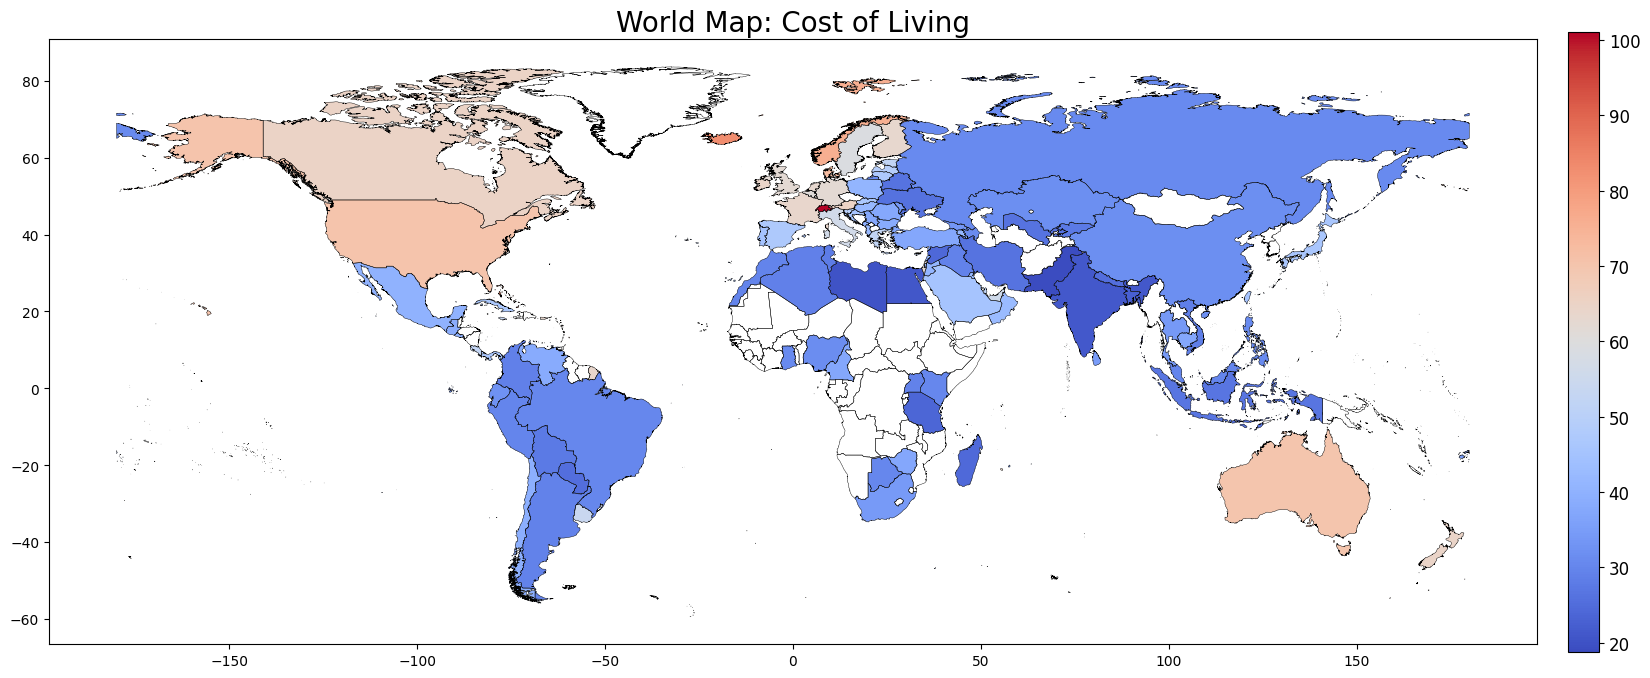

In [109]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Load the dataset
cost_of_living_df = pd.read_csv('Merged_Dataset_with_All_121_Countries.csv')

# Load the GeoJSON file
world_geojson = gpd.read_file('world_countries_geojson.geojson')

# Filter out Antarctica
world_geojson = world_geojson[world_geojson['name'] != 'Antarctica']

# Merge the GeoJSON data with the cost of living dataset
merged_gdf = world_geojson.merge(cost_of_living_df, left_on='name', right_on='Country', how='left')

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

# Plot boundaries with a custom edge color
merged_gdf.boundary.plot(ax=ax, color='black', linewidth=0.3)

# Plot the Cost of Living Index with a color map and black edges
map_plot = merged_gdf.plot(column='Cost of Living Index', cmap='coolwarm', linewidth=0.01, ax=ax, edgecolor='black',
                           legend=False, norm=Normalize(vmin=cost_of_living_df['Cost of Living Index'].min(),
                                                        vmax=cost_of_living_df['Cost of Living Index'].max()))

# Add a single color bar
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=Normalize(vmin=cost_of_living_df['Cost of Living Index'].min(),
                                                           vmax=cost_of_living_df['Cost of Living Index'].max()))
sm.set_array([])
colorbar = fig.colorbar(sm, ax=ax, fraction=0.02, pad=0.02)
colorbar.ax.tick_params(labelsize=12)

# Set the title of the map
ax.set_title('World Map: Cost of Living', fontsize=20)

# Show the plot
plt.show()


In [54]:
file_path = 'Merged_Dataset_with_All_121_Countries.csv'
dataset = pd.read_csv(file_path)

dataset.head()
top_10_countries = dataset.nlargest(10, 'Cost of Living Index')[['Country', 'Cost of Living Index', 'country_code']]

top_10_countries

,Country,Cost of Living Index,country_code
0,Switzerland,101.1,CH
1,Bahamas,85.0,BS
2,Iceland,83.0,IS
3,Singapore,76.7,SG
4,Barbados,76.6,BB
5,Norway,76.0,NO
6,Denmark,72.3,DK
7,Hong Kong (China),70.8,CN
8,United States,70.4,US
9,Australia,70.2,AU


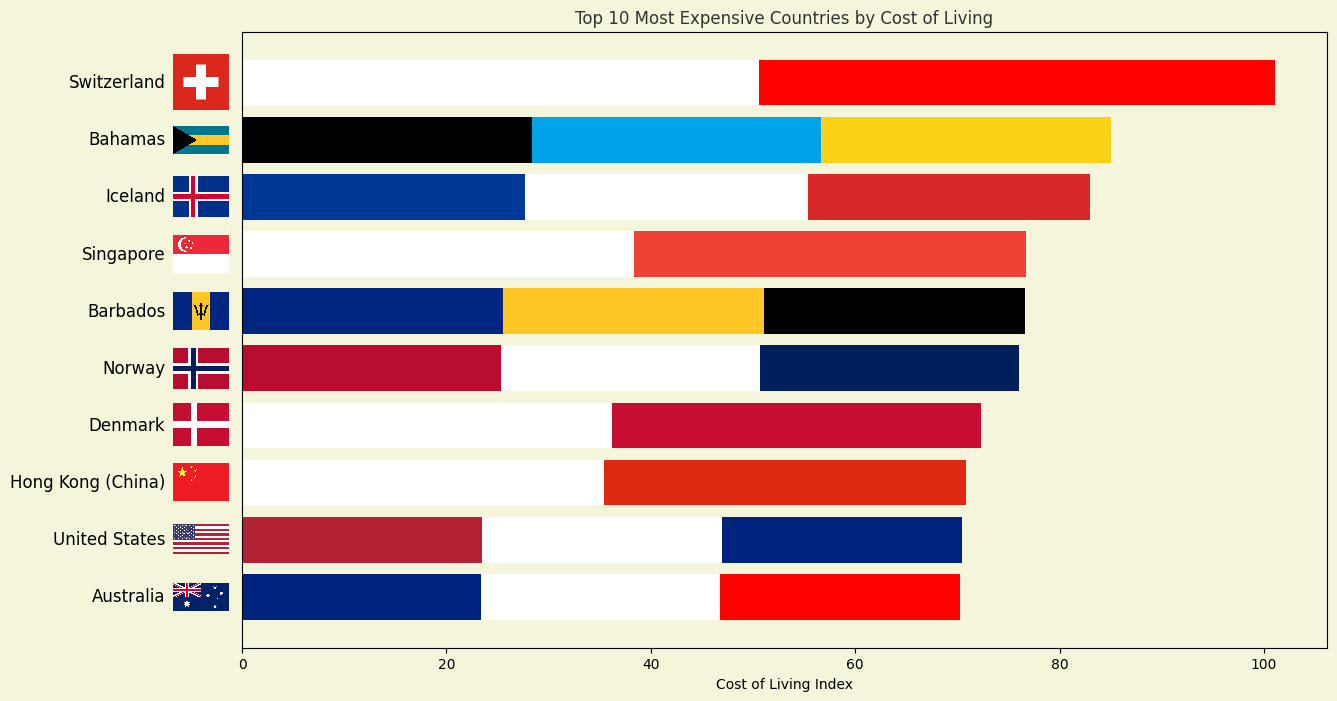

In [79]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

# Define flag colors for each country
flag_colors = {
    'Switzerland': ['#ffffff', '#ff0000'],  # Red and white
    'Bahamas': ['#000000', '#00a2e8', '#fcd116'],  # Black, aquamarine, and yellow
    'Iceland': ['#003897', '#ffffff', '#d72828'],  # Blue, white, and red
    'Singapore': ['#ffffff', '#ef4135'],  # Red and white
    'Barbados': ['#00267f', '#ffc726', '#000000'],  # Blue, yellow, and black
    'Norway': ['#ba0c2f', '#ffffff', '#00205b'],  # Red, white, and blue
    'Denmark': ['#ffffff','#c60c30'],  # Red and white
    'Hong Kong (China)': ['#ffffff','#de2910'],  # Red and white
    'United States': ['#b22234', '#ffffff', '#00247d'],  # Red, white, and blue
    'Australia': ['#00247d', '#ffffff', '#ff0000']  # Blue, white, and red
}

# Path to the flags folder
flag_folder_path = '/content/drive/My Drive/country_flags/'

# Combine country names with flags
labels = []
for index, row in top_10_countries.iterrows():
    flag_path = f"{flag_folder_path}{row['country_code'].lower()}.png"
    img = mpimg.imread(flag_path)
    labels.append((row['Country'], img))

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('#f5f5dc')  # Change the figure background color
ax.set_facecolor('#f5f5dc')  # Change the axes background color

# Draw each bar with multiple colors
for i, row in top_10_countries.iterrows():
    country = row['Country']
    cost = row['Cost of Living Index']
    colors = flag_colors[country]

    # Calculate the width of each color segment
    segment_width = cost / len(colors)

    # Draw each color segment
    start = 0
    for color in colors:
        ax.barh(i, segment_width, left=start, color=color)
        start += segment_width

# Add flags to the y-axis labels with some space
for i, (country, img) in enumerate(labels):
    ax.text(-7.5, i, country, ha='right', va='center', fontsize=12)  # Place country name with space to the right
    imagebox = OffsetImage(img, zoom=0.04, clip_on=True)  # Adjust the zoom level for the flags
    ab = AnnotationBbox(imagebox, (0, i), frameon=False, xybox=(-30, 0), xycoords='data', boxcoords="offset points", pad=0)
    ax.add_artist(ab)

# Customize the chart
ax.set_yticks([])  # Remove the default y-axis ticks
ax.set_xlabel('Cost of Living Index')
ax.set_title('Top 10 Most Expensive Countries by Cost of Living', color='#333333')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top

plt.show()


In [61]:
file_path = 'Merged_Dataset_with_All_121_Countries.csv'
dataset = pd.read_csv(file_path)

dataset.head()
bottom_10_countries = dataset.nsmallest(10, 'Cost of Living Index')[['Country', 'Cost of Living Index', 'country_code']]

bottom_10_countries

,Country,Cost of Living Index,country_code
120,Pakistan,18.8,PK
119,Libya,20.4,LY
118,Egypt,21.0,EG
117,India,21.2,IN
116,Bangladesh,22.5,BD
115,Tanzania,23.8,TZ
114,Syria,24.0,SY
113,Madagascar,24.5,MG
112,Paraguay,25.4,PY
111,Nepal,25.5,NP


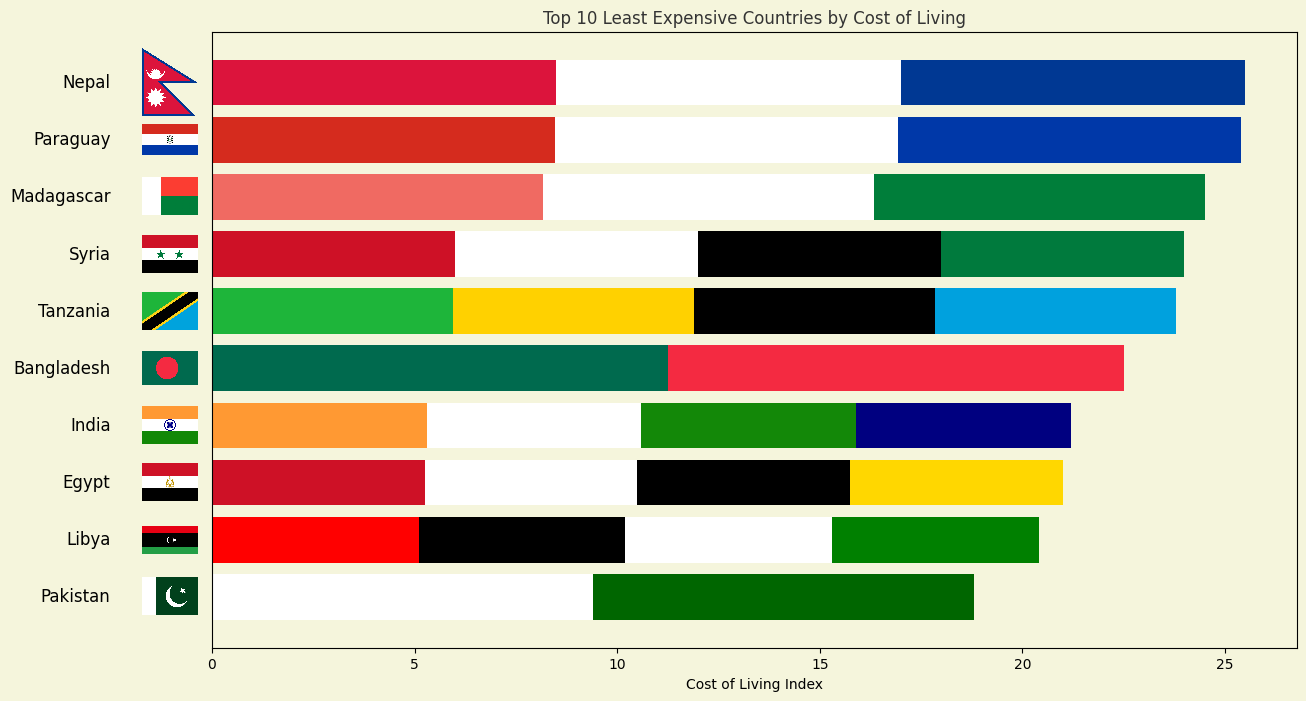

In [88]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

# Define flag colors for each country
flag_colors = {
    'Pakistan': ['#ffffff', '#006600'],  # Green and white
    'Libya': ['#FF0000', '#000000', '#ffffff','#008000'],  # Red, black, green, and white
    'Egypt': ['#CE1126', '#ffffff', '#000000', '#FFD700'],  # Red, white, black, and gold
    'India': ['#FF9933', '#ffffff', '#138808', '#000080'],  # Saffron, white, green, and blue
    'Bangladesh': ['#006a4e', '#F42A41'],  # Green and red
    'Tanzania': ['#1eb53a', '#FFD100', '#000000', '#00A1DE'],  # Green, yellow, black, and blue
    'Syria': ['#CE1126', '#ffffff', '#000000', '#007A3D'],  # Red, white, black, and green
    'Madagascar': ['#F06A62', '#ffffff', '#007E3A'],  # Red, white, and green
    'Paraguay': ['#D52B1E', '#ffffff', '#0038A8'],  # Red, white, and blue
    'Nepal': ['#DC143C','#ffffff','#003893' ]  # Crimson, blue, and white
}

# Path to the flags folder
flag_folder_path = '/content/drive/My Drive/country_flags/'

# Combine country names with flags
labels = []
for index, row in bottom_10_countries.iterrows():
    flag_path = f"{flag_folder_path}{row['country_code'].lower()}.png"
    img = mpimg.imread(flag_path)
    labels.append((row['Country'], img))

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('#f5f5dc')  # Change the figure background color
ax.set_facecolor('#f5f5dc')  # Change the axes background color

# Sort the data by the 'Cost of Living Index' in descending order
bottom_10_countries = bottom_10_countries.sort_values(by='Cost of Living Index', ascending=False).reset_index(drop=True)

# Draw each bar with multiple colors
for i, row in bottom_10_countries.iterrows():
    country = row['Country']
    cost = row['Cost of Living Index']
    colors = flag_colors[country]

    # Calculate the width of each color segment
    segment_width = cost / len(colors)

    # Draw each color segment
    start = 0
    for color in colors:
        ax.barh(i, segment_width, left=start, color=color)
        start += segment_width

# Add flags to the y-axis labels with some space
for i, (country, img) in enumerate(labels):
    ax.text(-2.5, i, country, ha='right', va='center', fontsize=12)  # Place country name with space to the right
    imagebox = OffsetImage(img, zoom=0.04, clip_on=True)  # Adjust the zoom level for the flags
    ab = AnnotationBbox(imagebox, (0, i), frameon=False, xybox=(-30, 0), xycoords='data', boxcoords="offset points", pad=0)
    ax.add_artist(ab)

# Customize the chart
ax.set_yticks([])  # Remove the default y-axis ticks
ax.set_xlabel('Cost of Living Index')
ax.set_title('Top 10 Least Expensive Countries by Cost of Living', color='#333333')
plt.gca().invert_yaxis()

plt.show()


<ipython-input-111-94bea723f45e>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Region', x='Cost of Living Index', data=cost_of_living_df, palette='RdBu', order=median_order_updated)


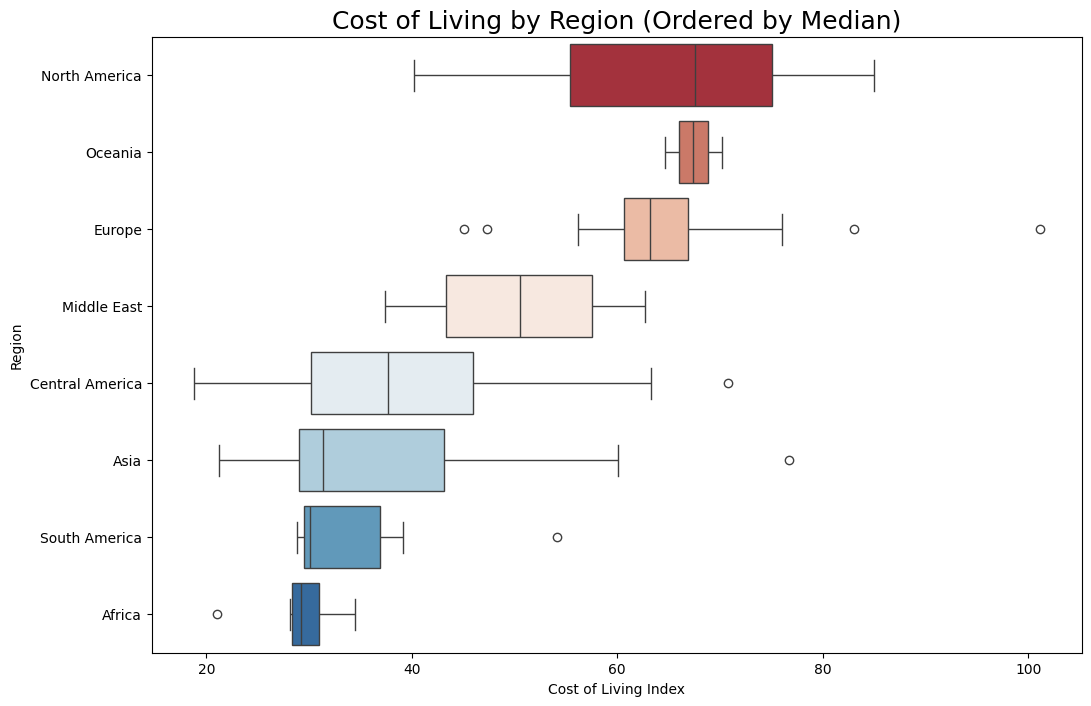

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
cost_of_living_df = pd.read_csv('Merged_Dataset_with_All_121_Countries.csv')

# Manual mapping of countries to regions
region_mapping = {
    'Africa': ['Algeria', 'Egypt', 'Morocco', 'Nigeria', 'South Africa', 'Tunisia'],
    'Asia': ['China', 'India', 'Indonesia', 'Japan', 'Malaysia', 'Philippines', 'Singapore', 'South Korea', 'Thailand', 'Vietnam'],
    'Europe': ['Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 'Iceland', 'Ireland', 'Italy', 'Netherlands', 'Norway', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom'],
    'North America': ['Bahamas', 'Barbados', 'Canada', 'Costa Rica', 'Mexico', 'United States'],
    'South America': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru', 'Uruguay'],
    'Oceania': ['Australia', 'New Zealand'],
    'Middle East': ['Israel', 'Saudi Arabia', 'Turkey', 'United Arab Emirates']
}

# Function to map each country to its region
def get_region_updated(country):
    for region, countries in region_mapping.items():
        if country in countries:
            return region
    return 'Central America'  # Assuming remaining countries fit this category

# Apply the updated mapping
cost_of_living_df['Region'] = cost_of_living_df['Country'].apply(get_region_updated)

# Recalculate the median order with the updated region names
median_order_updated = cost_of_living_df.groupby('Region')['Cost of Living Index'].median().sort_values(ascending=False).index

# Create a horizontal box plot with the corrected color scheme (flip the palette)
plt.figure(figsize=(12, 8))
sns.boxplot(y='Region', x='Cost of Living Index', data=cost_of_living_df, palette='RdBu', order=median_order_updated)
plt.title('Cost of Living by Region (Ordered by Median)', fontsize=18)
plt.xlabel('Cost of Living Index')
plt.ylabel('Region')
plt.show()
